In [ ]:
!pip install enzope --upgrade

In [ ]:
import numpy as np
import enzope
from matplotlib import pyplot as plt
from tqdm import tqdm

In [ ]:
# Parametros
n_models = 1000
n_agents = 1000 # 1000 sistemas de 1000 agentes = un millon de puntos
r_max = .8
mcs = 100000 # un millon de pasos corren en 1 segundo :D

In [ ]:
ensemble = enzope.GPUEnsemble(n_models=n_models, n_agents=n_agents, f=.1)

In [ ]:
for i in range(n_models):
    ensemble.models[i].r = np.random.uniform(0, r_max, size=n_agents).astype(np.float32)

In [ ]:
for model, rng_state in tqdm(zip(ensemble.models, ensemble.rng_states)):
    model.MCS(mcs, ensemble.tpb, ensemble.bpg, rng_state)

1000it [12:01,  1.39it/s]


In [ ]:
wealths = [model.w for model in ensemble.models]
wealths = [w for sublist in wealths for w in sublist]

risks = [model.r for model in ensemble.models]
risks = [r for sublist in risks for r in sublist]
len(wealths), np.max(risks)

(1000000, 0.79999876)

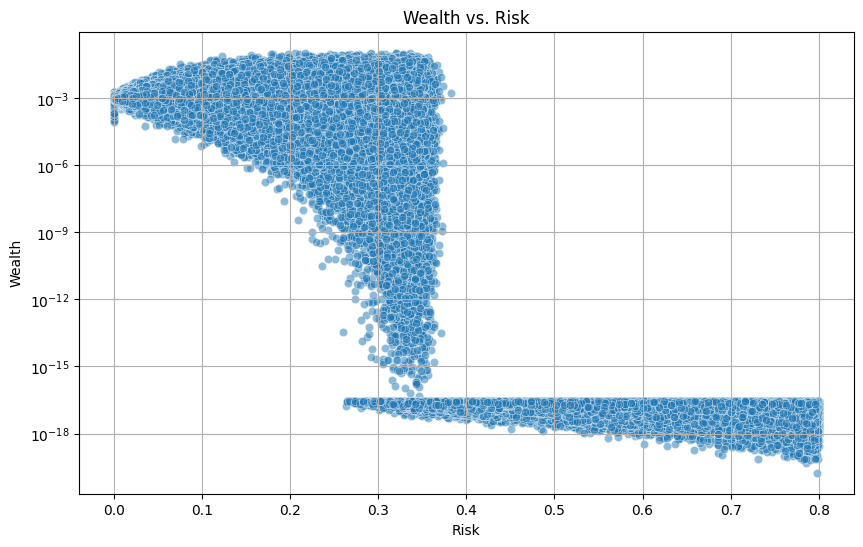

In [ ]:
import seaborn as sns

# Plot KDE plot for each risk level
plt.figure(figsize=(10, 6))
sns.scatterplot(x=risks, y=wealths, alpha=0.5)
plt.xlabel('Risk')
plt.ylabel('Wealth')
plt.yscale('log')
plt.title('Wealth vs. Risk')
plt.grid(True)
plt.show()

In [ ]:
def plot(wealths, risks, r_max=1, num_bins=100, title=None):
    # Compute the bin edges
    bin_edges = np.linspace(0, r_max, num_bins + 1)

    # Group wealth values (wealths) by binned risks and calculate mean wealth for each bin
    mean_wealth_by_bin = []
    for i in range(num_bins):
        # Filter wealth values corresponding to the current risk bin
        bin_mask = (risks >= bin_edges[i]) & (risks < bin_edges[i + 1])

        wealths_in_bin = []

        for i, w in enumerate(wealths):
            if bin_mask[i]:
                wealths_in_bin.append(w)

        # Calculate mean wealth for the current risk bin
        mean_wealth = np.mean(wealths_in_bin if len(wealths_in_bin) > 4 else 0)
        mean_wealth_by_bin.append(mean_wealth)

    # Calculate the mean risk value for each bin
    mean_risk_by_bin = [(bin_edges[i] + bin_edges[i + 1]) / 2 for i in range(num_bins)]

    # Find the index of the bin with maximum wealth
    max_wealth_index = np.argmax(mean_wealth_by_bin)

    # Retrieve the mean risk and mean wealth for the bin with maximum wealth
    max_wealth_bin_risk = mean_risk_by_bin[max_wealth_index]
    max_wealth_bin_wealth = mean_wealth_by_bin[max_wealth_index]

    # Print the mean risk and mean wealth for the bin with maximum wealth
    print(f"El bin con riesgo medio: {max_wealth_bin_risk:.3f} es el que tiene el maximo de riqueza media: {max_wealth_bin_wealth:.5f}")

    # Plot mean wealth for each risk bin
    plt.figure(figsize=(10, 6))
    plt.plot(mean_risk_by_bin, mean_wealth_by_bin)
    plt.xlim(0, r_max+.1)
    plt.xlabel('Riesgo medio del bin')
    plt.ylabel('Riqueza promedio')
    # plt.yscale('log')
    if not title:
        plt.title(f'Riqueza promedio del bin vs Riesgo ({num_bins} bines)')
    else:
        plt.title(title)
    plt.grid(True)
    plt.show()


#### 2 Gráficos: Hago bines de riesgos y calculo la riqueza media dentro de cada bin en función del riesgo. El primer gráfico tiene todos los agentes y el segundo solo tiene los agentes con $w>w_{min}$ Todo para el mismo f y r_max

El bin con riesgo medio: 0.266 es el que tiene el maximo de riqueza media: 0.00348


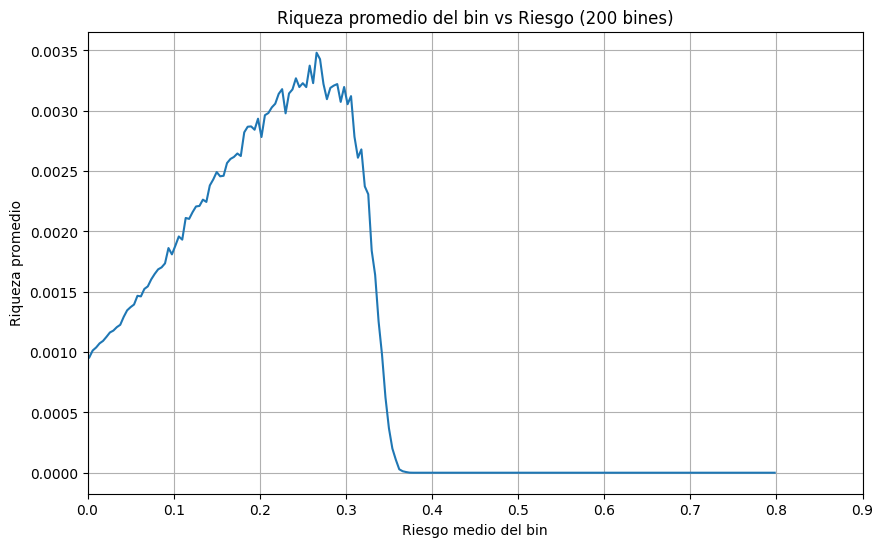

In [ ]:
plot(wealths, risks, num_bins=200, r_max=r_max)

El bin con riesgo medio: 0.266 es el que tiene el maximo de riqueza media: 0.00348


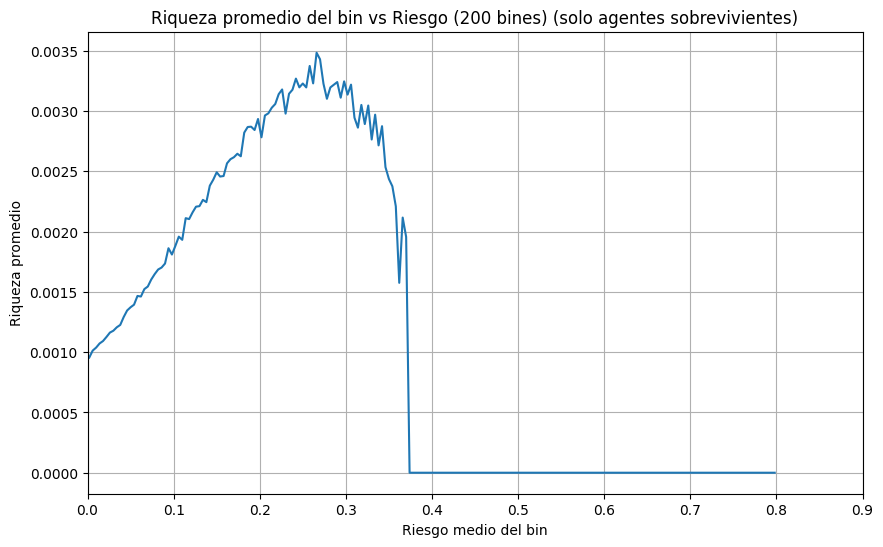

In [ ]:
mask_survivors = [True if w > 3e-17 else False for w in wealths]
mask_survivors
survivor_wealths = [w for i, w in enumerate(wealths) if mask_survivors[i]]
survivor_risks = [r for i, r in enumerate(risks) if mask_survivors[i]]

plot(survivor_wealths, survivor_risks, r_max=r_max, num_bins=200, title=f'Riqueza promedio del bin vs Riesgo ({200} bines) (solo agentes sobrevivientes)')

### Ahora hago lo mismo pero con $r_{max}=1$, a ver si da lo mismo

In [ ]:
ensemble2 = enzope.GPUEnsemble(n_models=n_models, n_agents=n_agents, f=.1)

In [ ]:
# Por defecto tiene r_max=1
for model, rng_state in tqdm(zip(ensemble2.models, ensemble2.rng_states)):
    model.MCS(mcs, ensemble2.tpb, ensemble2.bpg, rng_state)

1000it [09:26,  1.77it/s]


In [ ]:
wealths2 = [model.w for model in ensemble2.models]
wealths2 = [w for sublist in wealths2 for w in sublist]

risks2 = [model.r for model in ensemble2.models]
risks2 = [r for sublist in risks2 for r in sublist]
len(wealths2), np.max(risks2)

(1000000, 0.99999934)

El bin con riesgo medio: 0.278 es el que tiene el maximo de riqueza media: 0.00421


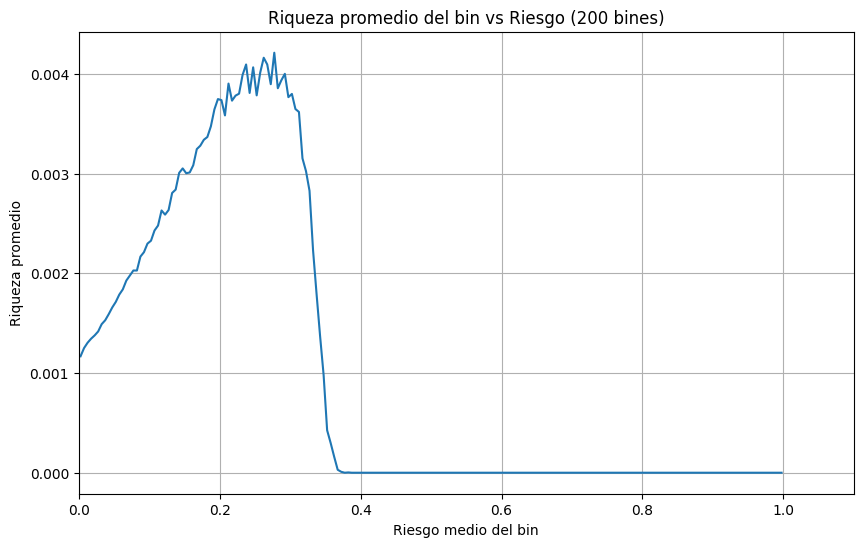

In [ ]:
plot(wealths2, risks2, num_bins=200, r_max=1)

El bin con riesgo medio: 0.278 es el que tiene el maximo de riqueza media: 0.00421


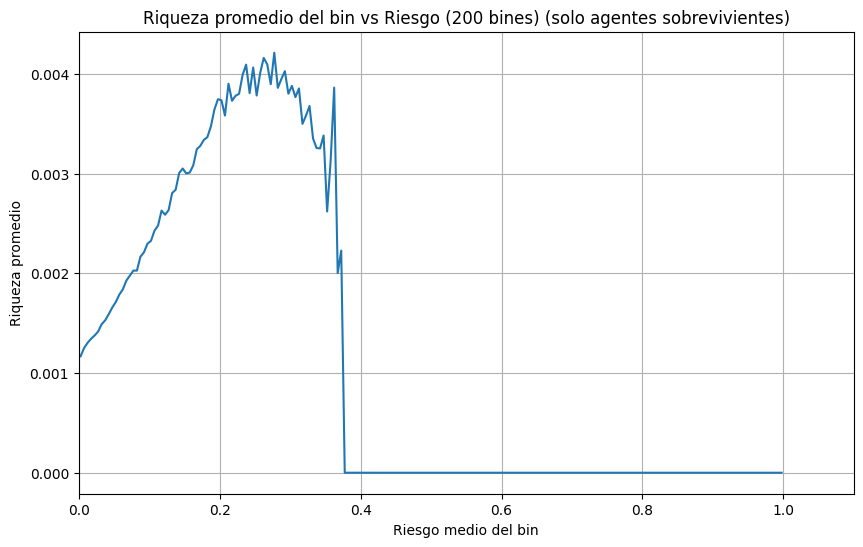

In [ ]:
mask_survivors2 = [True if w > 3e-17 else False for w in wealths2]
mask_survivors2
survivor_wealths2 = [w for i, w in enumerate(wealths2) if mask_survivors2[i]]
survivor_risks2 = [r for i, r in enumerate(risks2) if mask_survivors2[i]]

plot(survivor_wealths2, survivor_risks2, r_max=1, num_bins=200, title=f'Riqueza promedio del bin vs Riesgo ({200} bines) (solo agentes sobrevivientes)')